<h1> <center> Análise dados Intolerância Religiosa </center><h1>

In [25]:
import pandas as pd

import matplotlib.pyplot as plt

plt.style.use("ggplot")
%matplotlib inline

In [26]:
dados = pd.read_csv('dados_intolerancia_limpo.csv', low_memory=False)

In [27]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27447 entries, 0 to 27446
Data columns (total 49 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Submission Date                  27447 non-null  object
 1   UF                               27447 non-null  object
 2   Cidade                           27447 non-null  object
 3   Dano                             27447 non-null  object
 4   Violência                        27447 non-null  object
 5   Tipificação                      27447 non-null  object
 6   Vítima                           27447 non-null  object
 7   Gênero da vítima 1               27447 non-null  object
 8   Gênero da vítima 2               27447 non-null  object
 9   Gênero da vítima 3               27447 non-null  object
 10  Escolaridade da vítima 3         27447 non-null  object
 11  Escolaridade da vítima 2         27447 non-null  object
 12  Escolaridade da vítima 1        

In [28]:
dados.head()

,Submission Date,UF,Cidade,Dano,Violência,Tipificação,Vítima,Gênero da vítima 1,Gênero da vítima 2,Gênero da vítima 3,...,Raça/cor do agressor 1,Raça/cor do agressor 2,Raça/cor do agressor 3,Religião do agressor 1,Religião do agressor 2,Religião do agressor 3,Encaminhamentos,Resumo,Observações,Mês
0,2022/03/16 11:03:13,Pernambuco,santa cruz do capibaribe,Ignorado,Ignorado,Ignorado,Individual ou até 3 pessoas,Ignorado,Ignorado,Ignorado,...,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,9
1,2022/03/16 11:02:02,Pernambuco,recife,Ignorado,Ignorado,Ignorado,Individual ou até 3 pessoas,Feminino,Ignorado,Ignorado,...,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,10
2,2022/03/16 11:00:42,Pernambuco,buique,Ignorado,Ignorado,Ignorado,Individual ou até 3 pessoas,Masculino,Ignorado,Ignorado,...,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,11
3,2022/03/16 10:58:20,Pernambuco,recife,Ignorado,Ignorado,Ignorado,Individual ou até 3 pessoas,Feminino,Ignorado,Ignorado,...,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,11
4,2022/03/16 10:56:04,Pernambuco,buique,Ignorado,Ignorado,Ignorado,Individual ou até 3 pessoas,Feminino,Ignorado,Ignorado,...,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,11


 ### Análise

Em todas as bases que coletamos via LAI foram registrados 36235 denúnicas de 14 estados conforme tabela 1 abaixo, foram excluídos dados fora da janela temporal (2019-2021), excluido os dados nulos em data,475 linhas, dados nulos de UF e também 7775 dados indeferidos da variável Tipificação.  

Assim analisamos  27447 denúncias, com 2021 concentrando 45%. São Paulo é o estado com maior número de denúnicas, aproximadamente 75%, seguido do Rio de Janeiro, com 12%, e Espiríto Santo é o estado com menor número contabilizando apenas 2 denúncias.


 - Existem algum pico de denuncia por data/mês?

In [30]:
dados['Data da denúncia'] = pd.to_datetime(dados['Data da denúncia'])

In [31]:
dados['Data da denúncia'].dt.year.value_counts()

2021    12469
2020     8681
2019     6297
Name: Data da denúncia, dtype: int64

(array([0, 1, 2]),
 [Text(0, 0, '2021'), Text(1, 0, '2020'), Text(2, 0, '2019')])

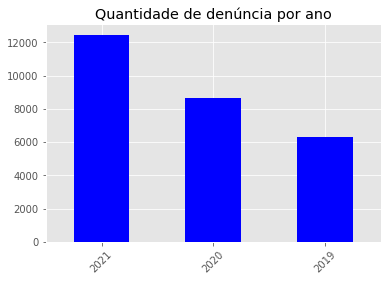

In [32]:
dados['Data da denúncia'].dt.year.value_counts().plot(kind='bar', color='blue', title='Quantidade de denúncia por ano')
plt.xticks(rotation=45)

In [34]:
round(dados['Data da denúncia'].dt.year.value_counts()*100/ 27447)

2021    45.0
2020    32.0
2019    23.0
Name: Data da denúncia, dtype: float64

In [36]:
dados['Data da denúncia'].dt.month.value_counts().sort_index().tolist()

[2525, 2250, 2686, 2235, 2158, 2513, 2420, 2187, 2108, 2412, 2417, 1536]

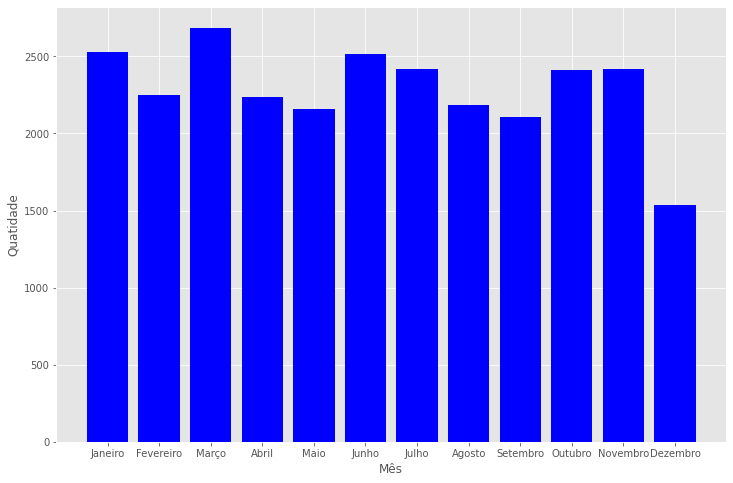

In [37]:
mes = ['Janeiro','Fevereiro','Março','Abril','Maio',"Junho","Julho", "Agosto", "Setembro","Outubro",'Novembro','Dezembro']
quant = dados['Data da denúncia'].dt.month.value_counts().sort_index().tolist()
# gráfico
x = mes
y = quant
plt.figure(figsize=(12,8))
plt.bar(x,y, color='blue')
plt.xlabel('Mês')
plt.ylabel('Quatidade')
plt.show()


- Denúncias pos UFs


In [38]:
# Quantidade por UF
dados['UF'].value_counts()

São Paulo            20690
Rio de Janeiro        3327
PR                    2737
MATO GROSSO            303
Minas gerais           181
Santa Catarina          62
Goiás                   40
Distrito Federal        34
Pernambuco              29
Rio Grande do Sul       18
Sergipe                 12
Alagoas                  6
Ceará                    6
Espírito Santo           2
Name: UF, dtype: int64

In [40]:
# Percentual de denuncias por UF
(round(dados['UF'].value_counts()*100/27447))

São Paulo            75.0
Rio de Janeiro       12.0
PR                   10.0
MATO GROSSO           1.0
Minas gerais          1.0
Santa Catarina        0.0
Goiás                 0.0
Distrito Federal      0.0
Pernambuco            0.0
Rio Grande do Sul     0.0
Sergipe               0.0
Alagoas               0.0
Ceará                 0.0
Espírito Santo        0.0
Name: UF, dtype: float64

 - Cidades por UFs
 
 Todas UF tem uma maior  prevalencia de denúncias por cidade específica, como visto na tabela abaixo. E dentre todas as cidades, São Paulo é a com maior número.

In [41]:
# Cidades com maior frequencia de denúncias por UF
dados.filter(items=['Cidade']).groupby(dados['UF']).describe()

Cidade         \
                   count unique   
UF                                
Alagoas                6      4   
Ceará                  6      6   
Distrito Federal      34     15   
Espírito Santo         2      2   
Goiás                 40     15   
MATO GROSSO          303     48   
Minas gerais         181    102   
PR                  2737    299   
Pernambuco            29     20   
Rio Grande do Sul     18      7   
Rio de Janeiro      3327     90   
Santa Catarina        62     39   
Sergipe               12      4   
São Paulo          20690    464   

                                                                            
                                                                 top  freq  
UF                                                                          
Alagoas                                                       maceió     3  
Ceará              ais16 - municípios: ararendá, catunda, crateús...     1  
Distrito Federal                                           ceilândia     5  
Espírito Santo                                               vitória     1  
Goiás                                                       anápolis     6  
MATO GROSSO                                                   cuiaba   138  
Minas gerais                                          belo horizonte    22  
PR                                                          curitiba   499  
Pernambuco                                                    recife     4  
Rio Grande do Sul                                       porto alegre     9  
Rio de Janeiro                                        rio de janeiro  1716  
Santa Catarina                                                itajaí     6  
Sergipe                                                      aracaju     9  
São Paulo                                                    s.paulo  7130

In [42]:
dados['Cidade'].value_counts()

s.paulo           7130
rio de janeiro    1716
guarulhos          858
campinas           671
curitiba           499
                  ... 
ituporanga           1
porto vitoria        1
lages                1
paracatu             1
anahy                1
Name: Cidade, Length: 1104, dtype: int64

 - Quais categorias em Dano mais ou menos predomina?
 
 O dano psicológico está presente em aproximadamente 94% das denúncias, apenas 1% são de dano material. 398 denúncias não declarou algum tipo de dano.

In [45]:
# 6619 denuncias não possui dados de dadnos
dados['Dano'].value_counts()

Psicológico    19823
Ignorado        6459
Físico           958
Material         207
Name: Dano, dtype: int64

In [47]:
round(dados['Dano'].value_counts()*100/27447)

Psicológico    72.0
Ignorado       24.0
Físico          3.0
Material        1.0
Name: Dano, dtype: float64

<AxesSubplot:title={'center':'Quantidade de denúncias por dano'}>

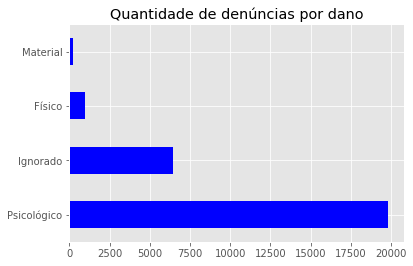

In [48]:
dados['Dano'].value_counts().plot(kind='barh', color='blue',  title = 'Quantidade de denúncias por dano')

 -  Tipificação
 
  Injúria está presente em 37,6% da tipificação das denúncias, seguido de Calúnia (art. 138), aproximadamente 21%

In [51]:
dados['Tipificação'].value_counts()*100/27447

Injúria (art. 140)                                                                                                                                                                                                         29.285532
Calúnia (art. 138)                                                                                                                                                                                                         16.191205
Difamação (art. 139)                                                                                                                                                                                                       11.585966
Injúria por preconceito                                                                                                                                                                                                    10.999381
INJURIA REFERENTE A RACA/COR/ETNIA/RELIGIAO/ORIGEM                                  

<AxesSubplot:title={'center':'As 10 tipificações com maior frequência nas denúncias'}>

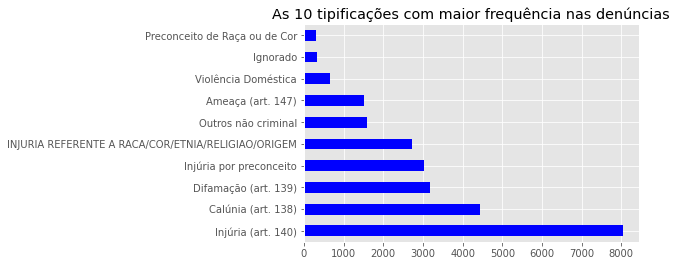

In [52]:
dados['Tipificação'].value_counts().head(10).plot(kind='barh', color='blue', title= 'As 10 tipificações com maior frequência nas denúncias')

In [56]:
dados['Tipificação'].describe()

count                  27447
unique                    97
top       Injúria (art. 140)
freq                    8038
Name: Tipificação, dtype: object

 - Vítimas
 
 99% das vítimas se enquandram na categoria Individual ou até 3 pessoas, 0.9% em Grupo ou coletivo e 1 denúncia não tem categorização. Todos os ddos nulos, sem informações e não se aplica foram substituidos por ignorados.
 Quanto ao gênero mulheres são as que mais sofre por intolerância religiosa, mas quando observamos os dados como grupo ou coletivo o gênero da vítima 1  em sua grande maioria são ignorados, conforme mostra tabela abaixo.


(array([0, 1, 2]),
 [Text(0, 0, 'Individual ou até 3 pessoas'),
  Text(1, 0, 'Grupo ou coletivo'),
  Text(2, 0, 'Ignorado')])

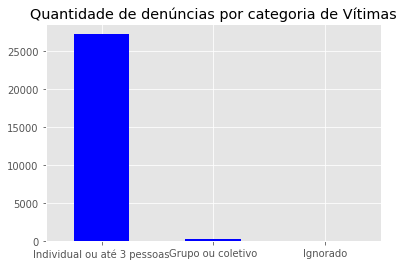

In [57]:
dados['Vítima'].value_counts().plot(kind='bar',color='blue', title='Quantidade de denúncias por categoria de Vítimas')
plt.xticks(rotation=360)


In [59]:
round(dados['Vítima'].value_counts()*100/27447)

Individual ou até 3 pessoas    99.0
Grupo ou coletivo               1.0
Ignorado                        0.0
Name: Vítima, dtype: float64

In [60]:
dados['Vítima'].value_counts()

Individual ou até 3 pessoas    27191
Grupo ou coletivo                255
Ignorado                           1
Name: Vítima, dtype: int64

In [65]:
# subset individual
df_vitimas_ind = pd.DataFrame(dados.where(dados['Vítima'] == 'Individual ou até 3 pessoas'))

In [66]:
# subset coletivo
df_vitimas_col = pd.DataFrame(dados.where(dados['Vítima'] == 'Grupo ou coletivo'))

In [63]:
# colocar na limpeza dos dados
dados['Gênero da vítima 1'] = dados['Gênero da vítima 1'].str.lower()

In [67]:
df_vitimas_ind['Gênero da vítima 1'].value_counts()

feminino     15575
masculino     9190
ignorado      2426
Name: Gênero da vítima 1, dtype: int64

In [68]:
df_vitimas_col['Gênero da vítima 1'].value_counts()

ignorado     199
feminino      32
masculino     24
Name: Gênero da vítima 1, dtype: int64

 - Escolaridade Agressor 1 e vítima 1

Agressor

In [70]:
round(dados['Agressor 1'].value_counts()*100/27447)

Individual ou até 3 pessoas    87.0
Ignorado                       12.0
Grupo ou coletivo               1.0
Coletivo ou grupo               0.0
Name: Agressor 1, dtype: float64

In [73]:
dados['Gênero do agressor 1'].value_counts()

Ignorado     24570
Masculino     1713
Feminino       930
MASCULINO      142
FEMININO        91
N,N              1
Name: Gênero do agressor 1, dtype: int64

In [74]:
dados['Religião do agressor 1'].value_counts()

Ignorado         27432
Não informado       14
Não Informada        1
Name: Religião do agressor 1, dtype: int64

<AxesSubplot:>

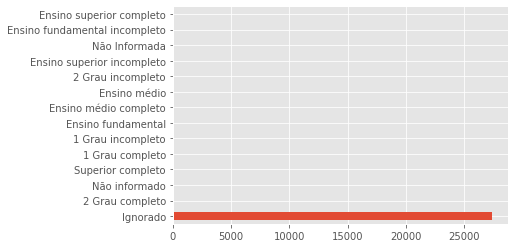

In [76]:
dados['Escolaridade do agressor 1'].value_counts().plot(kind='barh')

Vítima

In [77]:
dados['Escolaridade da vítima 1'].value_counts()

ignorado                         24461
ensino médio completo              852
sem informação                     518
1º grau incompleto                 439
3º grau completo                   333
2º grau incompleto                 234
3º grau incompleto                 233
ensino fundamental completo        201
alfabetizado(a)                     32
não alfabetizado(a)                 29
não informado                       24
especialização                      22
superior completo                   19
2 grau completo                      9
superior incompleto                  9
1 grau incompleto                    6
2 grau incompleto                    5
doutorado                            4
mestrado                             4
ensino superior completo             3
alfabetizado                         2
pós-graduado                         2
ensino fundamental incompleto        1
outros                               1
ensino básico incompleto             1
não alfabetizado         

<AxesSubplot:>

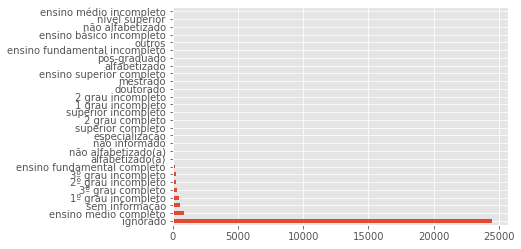

In [79]:
dados['Escolaridade da vítima 1'].value_counts().plot(kind='barh')

In [80]:
idade_ag = pd.DataFrame(dados.loc[dados['Idade do agressor 1'] != 'Ignorado'])

In [81]:
idade_ag = idade_ag.loc[idade_ag['Idade do agressor 1'] != '-']

In [82]:
idade_ag = idade_ag.loc[idade_ag['Idade do agressor 1'] != 'nao informado']

In [83]:
idade_ag['Idade do agressor 1'] = idade_ag['Idade do agressor 1'].astype(float)

In [84]:
idade_ag['Idade do agressor 1'].describe()

count    2250.000000
mean       39.867111
std        14.021061
min         0.000000
25%        30.000000
50%        39.000000
75%        49.000000
max       151.000000
Name: Idade do agressor 1, dtype: float64

 - Orientação Sexual, Raça/Cor e Religião (Vítima e Agressor)

Vitima 


In [85]:
dados['Orientação sexual da vítima 1'] = dados['Orientação sexual da vítima 1'].str.lower()

In [86]:
dados['Orientação sexual da vítima 1'].replace('ni', 'ignorado', inplace=True)

In [87]:
dados['Orientação sexual da vítima 1'].value_counts()

ignorado         27394
heterossexual       36
homossexual         13
parda                3
preta                1
Name: Orientação sexual da vítima 1, dtype: int64

<AxesSubplot:>

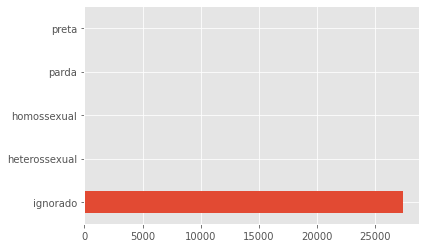

In [90]:
dados['Orientação sexual da vítima 1'].value_counts().plot(kind='barh')

In [93]:
round(dados['Raça/cor da vítima 1'].value_counts()*100/27447)

ignorado    86.0
negra       11.0
branca       3.0
amarela      0.0
índio        0.0
Name: Raça/cor da vítima 1, dtype: float64

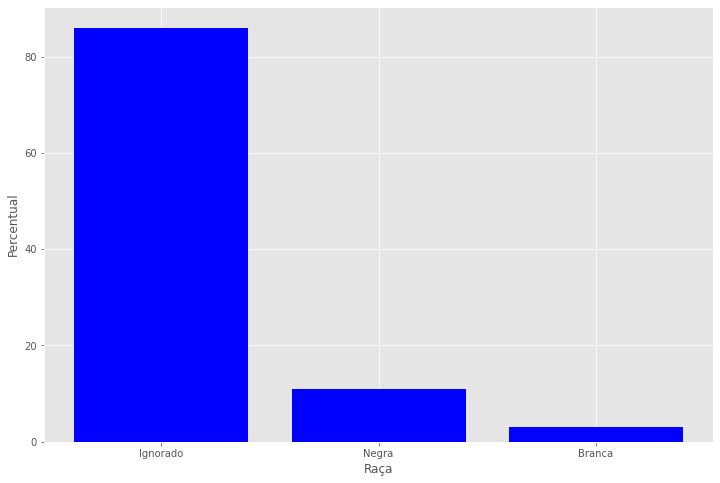

In [94]:
raca = ['Ignorado','Negra','Branca']
quant = [86, 11, 3]
# gráfico
x = raca
y = quant
plt.figure(figsize=(12,8))
plt.bar(x,y, color='blue')
plt.xlabel('Raça')
plt.ylabel('Percentual')
plt.show()


In [96]:
dados['Religião da vítima 1'].value_counts()

Ignorado           27427
Não informada         12
Matriz Africana        5
                       2
Evangélica             1
Name: Religião da vítima 1, dtype: int64

Agressor 

In [99]:
dados['Orientação sexual do agressor 1'].value_counts()

Ignorado         27138
NI                 284
HETEROSSEXUAL       19
Heterossexual        3
Não informada        2
Homossexual          1
Name: Orientação sexual do agressor 1, dtype: int64

<AxesSubplot:>

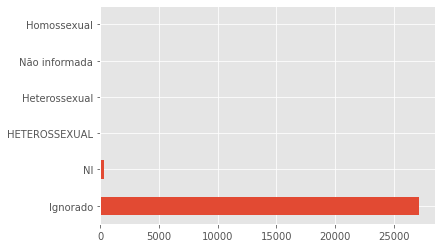

In [101]:
dados['Orientação sexual do agressor 1'].value_counts().plot(kind='barh')

In [102]:
dados['Raça/cor do agressor 1'].value_counts()

Ignorado                   14783
Não informada              12036
Branca                       204
NI                           190
Parda (negra)                 83
PARDA                         65
BRANCO                        37
Preta (negra)                 31
PRETA                         11
Outros                         4
REDS 2021-024180805-001        1
REDS 2021-036967929-001        1
Amarela                        1
Name: Raça/cor do agressor 1, dtype: int64

<AxesSubplot:>

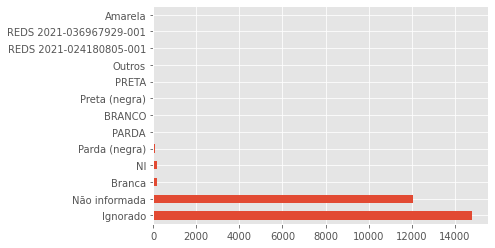

In [103]:
dados['Raça/cor do agressor 1'].value_counts().plot(kind='barh')

In [105]:
dados['Religião do agressor 1'].value_counts()

Ignorado         27432
Não informado       14
Não Informada        1
Name: Religião do agressor 1, dtype: int64

Idade

In [107]:
idade_vit = pd.DataFrame(dados.loc[dados['Idade da vítima 1'] !='Ignorado'])

In [108]:
idade_vit = pd.DataFrame(idade_vit.loc[idade_vit['Idade da vítima 1'] !='-'])

In [109]:
idade_vit = pd.DataFrame(idade_vit.loc[idade_vit['Idade da vítima 1'] != 'nao informado'])

In [112]:
idade_vit['Idade da vítima 1'] = idade_vit['Idade da vítima 1'].astype(float)

In [113]:
idade_vit.loc[idade_vit['Idade da vítima 1'] <= 15.0]

,Submission Date,UF,Cidade,Dano,Violência,Tipificação,Vítima,Gênero da vítima 1,Gênero da vítima 2,Gênero da vítima 3,...,Raça/cor do agressor 1,Raça/cor do agressor 2,Raça/cor do agressor 3,Religião do agressor 1,Religião do agressor 2,Religião do agressor 3,Encaminhamentos,Resumo,Observações,Mês
18,2022/03/16 09:39:46,Pernambuco,rio formoso,Ignorado,Ignorado,Ignorado,Individual ou até 3 pessoas,feminino,Ignorado,Ignorado,...,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,11
134,2022/03/11 12:11:32,São Paulo,s.paulo,Psicológico,Violência psicológica por motivação religiosa,Injúria (art. 140),Individual ou até 3 pessoas,feminino,Ignorado,Ignorado,...,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,§3o. Se a injúria consiste em raça/cor/etnia/r...,Ignorado,10326-2021-5301,10
215,2022/03/11 12:11:32,São Paulo,s.paulo,Psicológico,Violência psicológica por motivação religiosa,Ameaça (art. 147),Individual ou até 3 pessoas,masculino,Ignorado,Ignorado,...,Branca,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,20302-2021-1018,3
261,2022/03/11 12:11:32,São Paulo,pereira barreto,Material,Violência institucional por motivação religios...,Dano (art. 163),Individual ou até 3 pessoas,feminino,Feminino,Ignorado,...,Branca,Parda (negra),Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,50116-2019-120,4
262,2022/03/11 12:11:32,São Paulo,pereira barreto,Material,Violência institucional por motivação religios...,Dano (art. 163),Individual ou até 3 pessoas,feminino,Feminino,Ignorado,...,Ignorado,Ignorado,Parda (negra),Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,50116-2019-120,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27365,2022/03/17 16:28:00,PR,sao miguel do iguacu,Ignorado,Ignorado,INJURIA REFERENTE A RACA/COR/ETNIA/RELIGIAO/OR...,Individual ou até 3 pessoas,masculino,Ignorado,Ignorado,...,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,2021922247 - Sem dados de raça (vieram como M/...,9
27369,2022/03/17 16:28:00,PR,mariluz,Ignorado,Ignorado,INJURIA REFERENTE A RACA/COR/ETNIA/RELIGIAO/OR...,Individual ou até 3 pessoas,feminino,Ignorado,Ignorado,...,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,2021923995 - Sem dados de raça (vieram como M/...,9
27371,2022/03/17 16:28:00,PR,curitiba,Ignorado,Ignorado,INJURIA REFERENTE A RACA/COR/ETNIA/RELIGIAO/OR...,Individual ou até 3 pessoas,feminino,Masculino,Ignorado,...,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,2021931215 - Sem dados de raça (vieram como M/...,9
27377,2022/03/17 16:28:00,PR,itapejara do oeste,Ignorado,Ignorado,INJURIA REFERENTE A RACA/COR/ETNIA/RELIGIAO/OR...,Individual ou até 3 pessoas,masculino,Ignorado,Ignorado,...,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,2021933311 - Sem dados de raça (vieram como M/...,9


In [114]:
idade_vit['Idade da vítima 1'].describe()

count    24703.000000
mean        36.886775
std         12.744054
min          0.000000
25%         28.000000
50%         35.000000
75%         44.000000
max        126.000000
Name: Idade da vítima 1, dtype: float64

<AxesSubplot:>

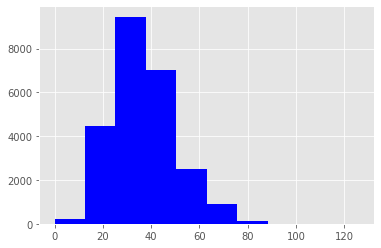

In [115]:
idade_vit['Idade da vítima 1'].hist(color='Blue')